In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df2 = pd.read_csv('df2.csv')
df2.head()

,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,gender_1,gender_2
0,0,18393,110,80,1,1,0,0,1,0,50,21.967120,0,1
1,1,20228,140,90,3,1,0,0,1,1,55,34.927679,1,0
2,2,18857,130,70,3,1,0,0,0,1,51,23.507805,1,0
3,3,17623,150,100,1,1,0,0,1,1,48,28.710479,0,1
4,4,17474,100,60,1,1,0,0,0,0,47,23.011177,1,0


## Train|validation|test split

In [31]:
from sklearn.model_selection import train_test_split

# separate the features and the target
X = df2.drop('cardio', axis=1)
y = df2['cardio']

display(X.head(), y.head())

,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,BMI,gender_1,gender_2
0,0,18393,110,80,1,1,0,0,1,50,21.967120,0,1
1,1,20228,140,90,3,1,0,0,1,55,34.927679,1,0
2,2,18857,130,70,3,1,0,0,0,51,23.507805,1,0
3,3,17623,150,100,1,1,0,0,1,48,28.710479,0,1
4,4,17474,100,60,1,1,0,0,0,47,23.011177,1,0


0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [32]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train|validation split on the training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Feature standardization using StandardScaler:

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize the StandardScaler
scaler_standard = StandardScaler()

# Fit the scaler on the training data
scaler_standard.fit(X_train)

# Transform the training, validation, and test sets
X_train_standard = scaler_standard.transform(X_train)
X_val_standard = scaler_standard.transform(X_val)
X_test_standard = scaler_standard.transform(X_test)

X_train_standard.shape, X_val_standard.shape, X_test_standard.shape

((43996, 13), (11000, 13), (13749, 13))

## Feature normalization using MinMaxScaler:

In [34]:
# Initialize the MinMaxScaler
scaler_minmax = MinMaxScaler()

# Fit the scaler on the training data
scaler_minmax.fit(X_train)

# Transform the training, validation, and test sets
X_train_normalized = scaler_minmax.transform(X_train)
X_val_normalized = scaler_minmax.transform(X_val)
X_test_normalized = scaler_minmax.transform(X_test)

X_train_normalized.shape, X_val_normalized.shape, X_test_normalized.shape

((43996, 13), (11000, 13), (13749, 13))

# Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for the logistic regression model
param_grid_lr = {
    'C': [0.1, 1, 10], 
    'solver': ['newton-cg', 'liblinear'],
    'penalty': ['l2'],
    'max_iter': [100, 200, 500]
}

## GridSearchCV for Logistic Regression

In [36]:
# Create a logistic regression model
lr_model = LogisticRegression(random_state=42)

# Create the grid search object
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, scoring='accuracy', cv=5)

# Fit the grid search object to the standardized training data
grid_search_lr.fit(X_train_standard, y_train)

# Fit the grid search object to the normalized training data
grid_search_lr_normalized = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, scoring='accuracy', cv=5) 
grid_search_lr_normalized.fit(X_train_normalized, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [100, 200, 500],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'liblinear']},
             scoring='accuracy')

In [37]:
# standard scaler
print("Best parameters found:", grid_search_lr.best_params_)
print("Best accuracy score:", grid_search_lr.best_score_) 

Best parameters found: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best accuracy score: 0.7264524739381542


In [38]:
# minmax scaler
print("Best parameters found:", grid_search_lr_normalized.best_params_)
print("Best accuracy score:", grid_search_lr_normalized.best_score_)

Best parameters found: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best accuracy score: 0.7266115829278121


## Prediction using the validation data

In [39]:
# Get the best logistic regression model found by grid search
best_lr_model = grid_search_lr.best_estimator_

# Make predictions on the validation dataset using the best logistic regression model
lr_val_predictions = best_lr_model.predict(X_val_standard)

# KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# Define hyperparameter grid for KNN model
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

## GridSearchCV for KNN

In [41]:
# Create a KNN model
knn_model = KNeighborsClassifier()

# Create the grid search object
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, scoring='accuracy', cv=5)

# Fit the grid search object to the standardized training data
grid_search_knn.fit(X_train_standard, y_train)

# Fit the grid search object to the normalized training data
grid_search_knn_normalized = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, scoring='accuracy', cv=5)
grid_search_knn_normalized.fit(X_train_normalized, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [42]:
# standard scaler
print("Best parameters found:", grid_search_knn.best_params_)
print("Best accuracy score:", grid_search_knn.best_score_)

Best parameters found: {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}
Best accuracy score: 0.7159287651489322


In [43]:
# minmax scaler
print("Best parameters found:", grid_search_knn_normalized.best_params_)
print("Best accuracy score:", grid_search_knn_normalized.best_score_)

Best parameters found: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
Best accuracy score: 0.7097463658060317


## Prediction using the validation data

In [44]:
# Get the best KNN model found by grid search
best_knn_model = grid_search_knn.best_estimator_

# Make predictions on the validation dataset using the best KNN model
knn_val_predictions = best_knn_model.predict(X_val_standard)

# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameter grid for the decision tree model
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 9, 11, 15],
    "min_samples_split": [2, 3, 5, 7, 9, 11, 15],
    "min_samples_leaf": [1, 2, 3, 5, 7, 9, 11, 15],
}

## GridSearchCV for decision tree

In [46]:
# Create a decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Create the grid search object
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='accuracy', cv=5)

# Fit the grid search object to the standardized training data
grid_search_dt.fit(X_train_standard, y_train)

# Fit the grid search object to the normalized training data
grid_search_dt_normalized = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='accuracy', cv=5)
grid_search_dt_normalized.fit(X_train_normalized, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 15],
                         'min_samples_leaf': [1, 2, 3, 5, 7, 9, 11, 15],
                         'min_samples_split': [2, 3, 5, 7, 9, 11, 15]},
             scoring='accuracy')

In [47]:
# standard scaler
print("Best parameters found:", grid_search_dt.best_params_)
print("Best accuracy score:", grid_search_dt.best_score_)

Best parameters found: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 2}
Best accuracy score: 0.7290664228373058


In [48]:
# minmax scaler
print("Best parameters found:", grid_search_dt_normalized.best_params_)
print("Best accuracy score:", grid_search_dt_normalized.best_score_)

Best parameters found: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 2}
Best accuracy score: 0.7290664228373058


## Prediction using the validation data

In [49]:
# Get the best Decision Tree model found by grid search
best_dt_model = grid_search_dt.best_estimator_ 

# Make predictions on the validation dataset using the best decision tree model
dt_val_predictions = best_dt_model.predict(X_val_standard) 

## Calculate the accuracy score for the validation data using all three models

In [50]:
from sklearn.metrics import accuracy_score

lr_val_accuracy = accuracy_score(y_val, lr_val_predictions)
knn_val_accuracy = accuracy_score(y_val, knn_val_predictions)
dt_val_accuracy = accuracy_score(y_val, dt_val_predictions)

print("Logistic Regression validation accuracy:", lr_val_accuracy)
print("KNN validation accuracy:", knn_val_accuracy)
print("Decision Tree validation accuracy:", dt_val_accuracy)

Logistic Regression validation accuracy: 0.7294545454545455
KNN validation accuracy: 0.7204545454545455
Decision Tree validation accuracy: 0.731


## Dataframe and final model selection

|                      | Logestic Reg | KNN         | Decision Tree |
| -----                | --------     |----         |--------       |
| df1 (accuracy score) | 0.704        | 0.686       | 0.697         |
| df2 (accuracy score) | 0.729        | 0.720       | 0.731         |
                       
Based on the accuracy score, the best model is Decision Tree with the df2 data.

## Use the chosen model and train it on the entire data, except the test data

In [51]:
# combine the training and validation data
X_train_val = pd.concat([X_train, X_val], axis=0, ignore_index=True)
y_train_val = pd.concat([y_train, y_val], axis=0, ignore_index=True)

X_train_val.shape, y_train_val.shape

((54996, 13), (54996,))

In [52]:
# Fit the best decision tree model to the combined training and validation data
best_dt_model.fit(X_train_val, y_train_val)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, random_state=42)

## Voting Classifier

In [53]:
from sklearn.ensemble import VotingClassifier

# Create the VotingClassifier object with the best models
voting_clf = VotingClassifier(
    estimators=[
        ('lr', best_lr_model),
        ('knn', best_knn_model),
        ('dt', best_dt_model)
    ],
    voting='hard'
)

# Fit the VotingClassifier on the combined training and validation data
voting_clf.fit(X_train_val, y_train_val)

c:\Users\hadda\.virtualenvs\Machine-learning-Elias-El-Haddad-LBeJrVzk\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\hadda\.virtualenvs\Machine-learning-Elias-El-Haddad-LBeJrVzk\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\hadda\.virtualenvs\Machine-learning-Elias-El-Haddad-LBeJrVzk\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1, random_state=42,
                                                 solver='newton-cg')),
                             ('knn',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=15)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_leaf=15,
                                                     random_state=42))])

## Evaluation

In [54]:
# Make prediction on the test data using the best decision tree model and the voting classifier
dt_test_predictions = best_dt_model.predict(X_test)
voting_test_predictions = voting_clf.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

dt_confusion_matrix = confusion_matrix(y_test, dt_test_predictions) # confusion matrix for the best decision tree model
voting_confusion_matrix = confusion_matrix(y_test, voting_test_predictions) # confusion matrix for the voting classifier

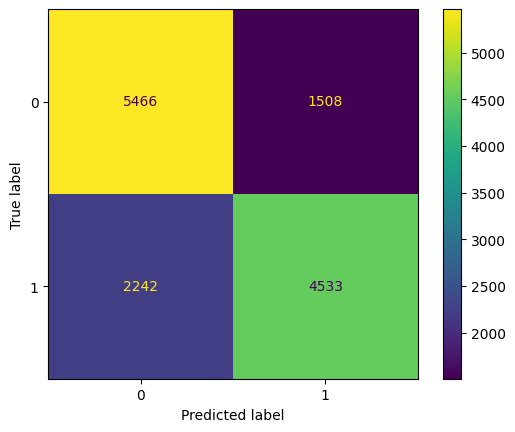

In [56]:
ConfusionMatrixDisplay(dt_confusion_matrix, display_labels = ['0', '1']).plot()

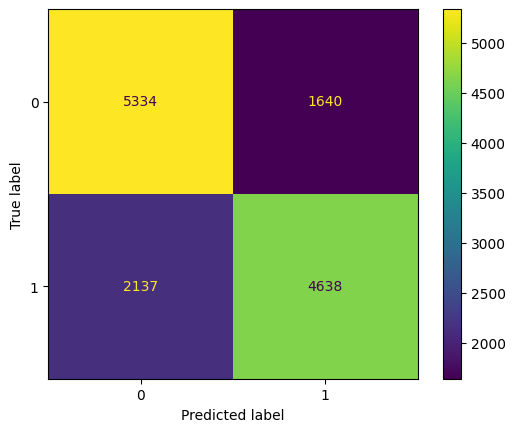

In [57]:
ConfusionMatrixDisplay(voting_confusion_matrix, display_labels = ['0', '1']).plot()

In [58]:
from sklearn.metrics import classification_report

dt_classification_report = classification_report(y_test, dt_test_predictions) # classification report for the best decision tree model
voting_classification_report = classification_report(y_test, voting_test_predictions) # classification report for the voting classifier

In [59]:
print("Decision Tree Classification Report:\n", dt_classification_report)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.74      6974
           1       0.75      0.67      0.71      6775

    accuracy                           0.73     13749
   macro avg       0.73      0.73      0.73     13749
weighted avg       0.73      0.73      0.73     13749



In [60]:
print("Voting Classifier Classification Report:\n", voting_classification_report)

Voting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.76      0.74      6974
           1       0.74      0.68      0.71      6775

    accuracy                           0.73     13749
   macro avg       0.73      0.72      0.72     13749
weighted avg       0.73      0.73      0.72     13749



## Comparison of the two models

- (0,0) : True Negative : The Decision Tree has a better performance in terms of true negatives (5466 vs. 5334)
- (0,1) : False Positive : The Decision Tree has fewer false positives (1508 vs. 1640)
- (1,1) : True Positive : The Voting Classifier has better performance in terms of true positives (4638 vs. 4533)
- (1,0) : False Negative : The Voting Classifier has fewer false negatives (2137 vs. 2242)

In terms of classification reports, the Decision Tree and Voting Classifier models have the same accuracy (0.73). The models have similar precision and F1-scores for both classes, with slight differences in recall. The Decision Tree has a higher recall for class 0 (0.78 vs. 0.76) but a lower recall for class 1 (0.67 vs. 0.68).

In conclusion, both models have almost a similar performance with a slight advantage for the Decision Tree model.

## Deployment

In [93]:
data = df2
data.head()

,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,gender_1,gender_2
0,0,18393,110,80,1,1,0,0,1,0,50,21.967120,0,1
1,1,20228,140,90,3,1,0,0,1,1,55,34.927679,1,0
2,2,18857,130,70,3,1,0,0,0,1,51,23.507805,1,0
3,3,17623,150,100,1,1,0,0,1,1,48,28.710479,0,1
4,4,17474,100,60,1,1,0,0,0,0,47,23.011177,1,0


In [94]:
# Randomly select 100 rows 
test_samples = data.sample(n=100, random_state=42)

# Save the test samples to a csv file
test_samples.to_csv("test_samples.csv", index=False)

test_samples.head()

,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,gender_1,gender_2
32075,46648,16864,120,80,1,1,0,0,1,1,46,23.875115,1,0
13150,19103,23241,160,90,3,3,0,0,1,1,63,28.935185,1,0
54322,78893,18347,120,80,3,1,0,0,1,1,50,24.740937,1,0
9818,14268,22574,120,80,1,1,0,0,1,0,61,27.915519,0,1
30751,44711,19248,120,80,1,1,0,0,1,0,52,28.668892,1,0


In [95]:
# Remove the selected 100 rows from the dataset
data_remaining = data.drop(test_samples.index)

In [96]:
# Prepare your features and target variable
X = data_remaining.drop("cardio", axis=1)
y = data_remaining["cardio"]

In [97]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# Train the best Decision Tree model
best_dt_model = DecisionTreeClassifier(
    criterion="gini", max_depth=5, min_samples_split=2, min_samples_leaf=15 # best hyperparameters found by grid search
)

best_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=15)

In [100]:
import joblib

# Save the trained model as a .pkl file
joblib.dump(best_dt_model, "best_dt_model.pkl", compress=3) # compress=3 is used to reduce the size of the file

['best_dt_model.pkl']

## Conclusion

In [101]:
# Load the data from prediction.csv to check the final predictions
final = pd.read_csv("prediction.csv")
final.head()

,probability_class_0,probability_class_1,prediction
0,0.713560,0.286440,0
1,0.135442,0.864558,1
2,0.210714,0.789286,1
3,0.464959,0.535041,1
4,0.713560,0.286440,0


In [103]:
# the probability_class_0 and probability_class_1 columns in ascending order
final.sort_values(by=['probability_class_0', 'probability_class_1'], ascending=True)

,probability_class_0,probability_class_1,prediction
1,0.135442,0.864558,1
13,0.135442,0.864558,1
19,0.135442,0.864558,1
30,0.135442,0.864558,1
33,0.135442,0.864558,1
...,...,...,...
44,0.875440,0.124560,0
63,0.875440,0.124560,0
73,0.875440,0.124560,0
85,0.875440,0.124560,0


<Axes: ylabel='Frequency'>

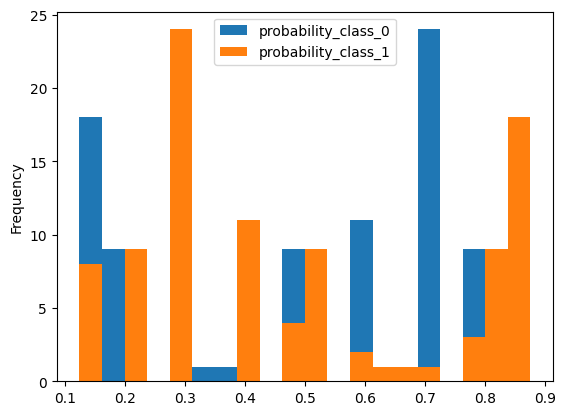

In [104]:
# plot the distribution of the probability_class_0 and probability_class_1 columns
final[['probability_class_0', 'probability_class_1']].plot(kind='hist', bins=20)

In [110]:
final['prediction'].value_counts()

0    56
1    44
Name: prediction, dtype: int64

In [105]:
df = pd.read_csv('../data/cardio_train.csv', sep=';')
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [115]:
df2['cardio'].value_counts()

0    34723
1    34022
Name: cardio, dtype: int64